# **ICE: Correlation Analysis \& T-Tests**

## Name: Cabot Steward
## *DATA 3300*

In this assignment, you will use the CacheHomes dataset to explore and understand the application of correlation analysis and t-tests in a real-world context. You will start with correlation analysis to examine relationships between various property features and prices, using Pearson and Spearman correlation coefficients to understand the dataset better. This will help you identify significant relationships and patterns within the data. After gaining insights from the correlation analysis, you will proceed to hypothesis testing by conducting paired and independent t-tests. These tests will allow you to further investigate group differences and changes over time in the dataset.



**Load the dataset and display the first few rows to understand its structure.
Then, calculate and display the descriptive statistics for numerical columns.**

In [1]:
# Import necessary libraries for statistical analysis and data manipulation
import pandas as pd
from scipy.stats import ttest_ind, pearsonr, ttest_rel
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cachehomes_F24.csv')
# display heading
df.head()

,Unnamed: 0,PROPERTYID,SINGLE-FAMILY,QUADRANT,CITY,ZIP,PRICE,PRICE_reduced,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,AGE,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,Beauty
0,34,1,y,NE,North Logan,84341,699000,619000,7,4.5,8511,57934.0,1992,27,243,82,0,41.759955,-111.802758,3.333333
1,35,2,y,NE,North Logan,84341,699000,619000,7,4.5,8511,57934.0,1992,27,243,82,0,41.759955,-111.802758,3.666667
2,0,3,y,NE,Logan,84321,650000,570000,4,1.5,2054,21780.0,1893,126,240,316,0,41.744230,-111.817663,4.666667
3,55,4,y,NE,North Logan,84341,1100000,1020000,7,5.5,6827,60983.0,2001,18,240,161,0,41.790339,-111.785897,4.333333
4,38,5,y,SE,Providence,84332,410000,340000,5,3.5,4118,12632.0,1994,25,229,100,0,41.702689,-111.801081,5.666667


In [5]:
# describe the dataset, removing the primary key and zip
df.drop(columns=["PROPERTYID", "ZIP"], inplace=True)
df.describe()

,Unnamed: 0,PRICE,PRICE_reduced,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,AGE,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,Beauty
count,94.000000,9.400000e+01,9.400000e+01,94.000000,94.000000,94.000000,92.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,46.500000,3.859952e+05,3.667399e+05,4.031915,2.630319,2959.244681,16362.956522,1991.468085,27.531915,68.265957,132.042553,28.510638,41.737874,-111.826518,4.322695
std,27.279418,4.573380e+05,4.520213e+05,1.575703,1.273557,2444.766676,42805.658028,26.366606,26.366606,62.187053,45.044283,54.200691,0.028263,0.022404,1.005899
min,0.000000,1.175000e+05,1.175000e+05,1.000000,1.000000,551.000000,435.000000,1893.000000,0.000000,1.000000,78.000000,0.000000,41.686994,-111.873557,2.000000
25%,23.250000,2.311500e+05,2.084750e+05,3.000000,1.750000,1604.250000,5989.000000,1980.000000,9.000000,12.250000,103.000000,0.000000,41.714893,-111.842834,3.666667
50%,46.500000,2.765000e+05,2.549500e+05,4.000000,2.500000,2196.000000,9147.000000,1996.000000,23.000000,59.000000,124.000000,0.000000,41.735550,-111.825954,4.333333
75%,69.750000,3.737250e+05,3.467500e+05,5.000000,3.000000,3635.250000,14810.000000,2010.000000,39.000000,89.500000,149.000000,17.750000,41.759919,-111.808571,5.000000
max,93.000000,3.999000e+06,3.959000e+06,9.000000,9.250000,19641.000000,407286.000000,2019.000000,126.000000,243.000000,343.000000,250.000000,41.794592,-111.778683,6.666667


### 1)
**Let's begin with understanding how these variables relate to one another. Select two variables you believe could be strongly correlated, then create a null and alternative hypothesis that includes the direction of the relationship:**

Price & Squart Feet
* $H_0$: There is no positive correlation between the price of a home and its square footage.
* $H_A$: There is a positive correlation between the price of a home and its square footage.

### A)

**Before running the analysis, let's examine the Pearson assumption of Normality...**

In [7]:
# view columns
df.columns

Index(['Unnamed: 0', 'SINGLE-FAMILY', 'QUADRANT', 'CITY', 'PRICE',
       'PRICE_reduced', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', 'AGE', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH',
       'LATITUDE', 'LONGITUDE', 'Beauty'],
      dtype='object')

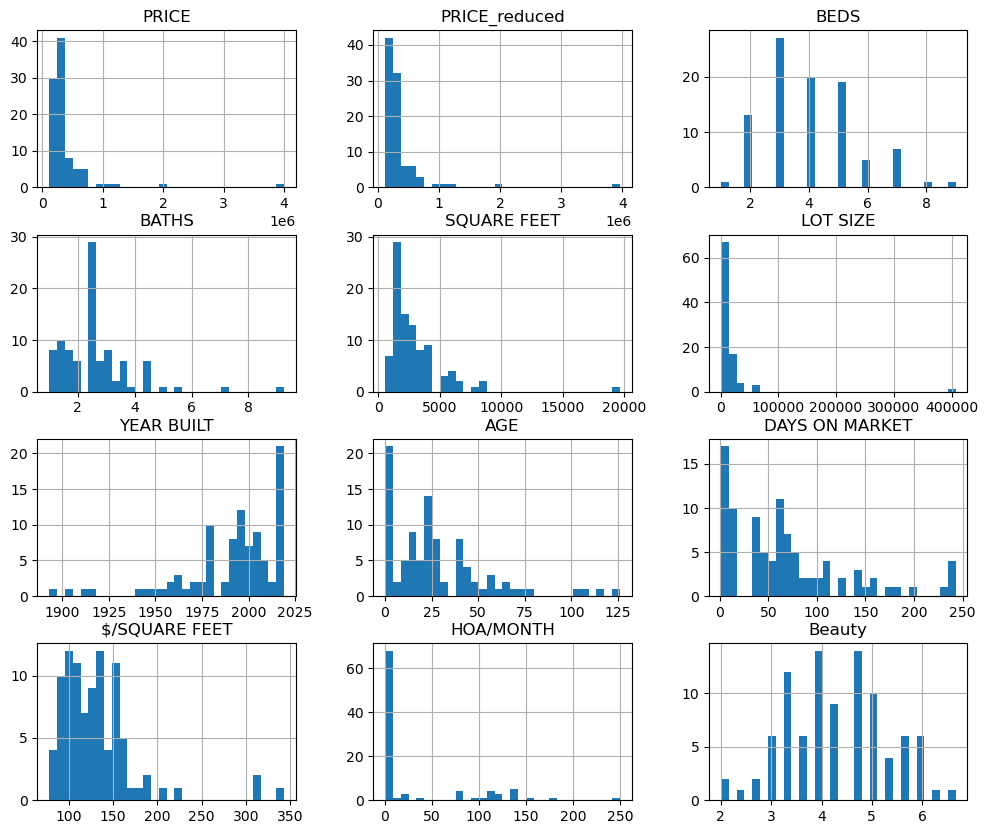

In [9]:
df_corr = df.drop(['Unnamed: 0', 'SINGLE-FAMILY', 'QUADRANT', 'CITY', 'LATITUDE', 'LONGITUDE'], axis = 1) # drop qualitative columns from new copy of dataframe
df_corr.hist(layout=(4,3), figsize=(12,10), bins=30) #generate histograms of remaining numerical vars
plt.show()

### B)
**Which, if any, variables follow a roughly normal distribution?**

Beauty is probably the best.

### C)

**Transform the non-normally distributed variables using log or square root**

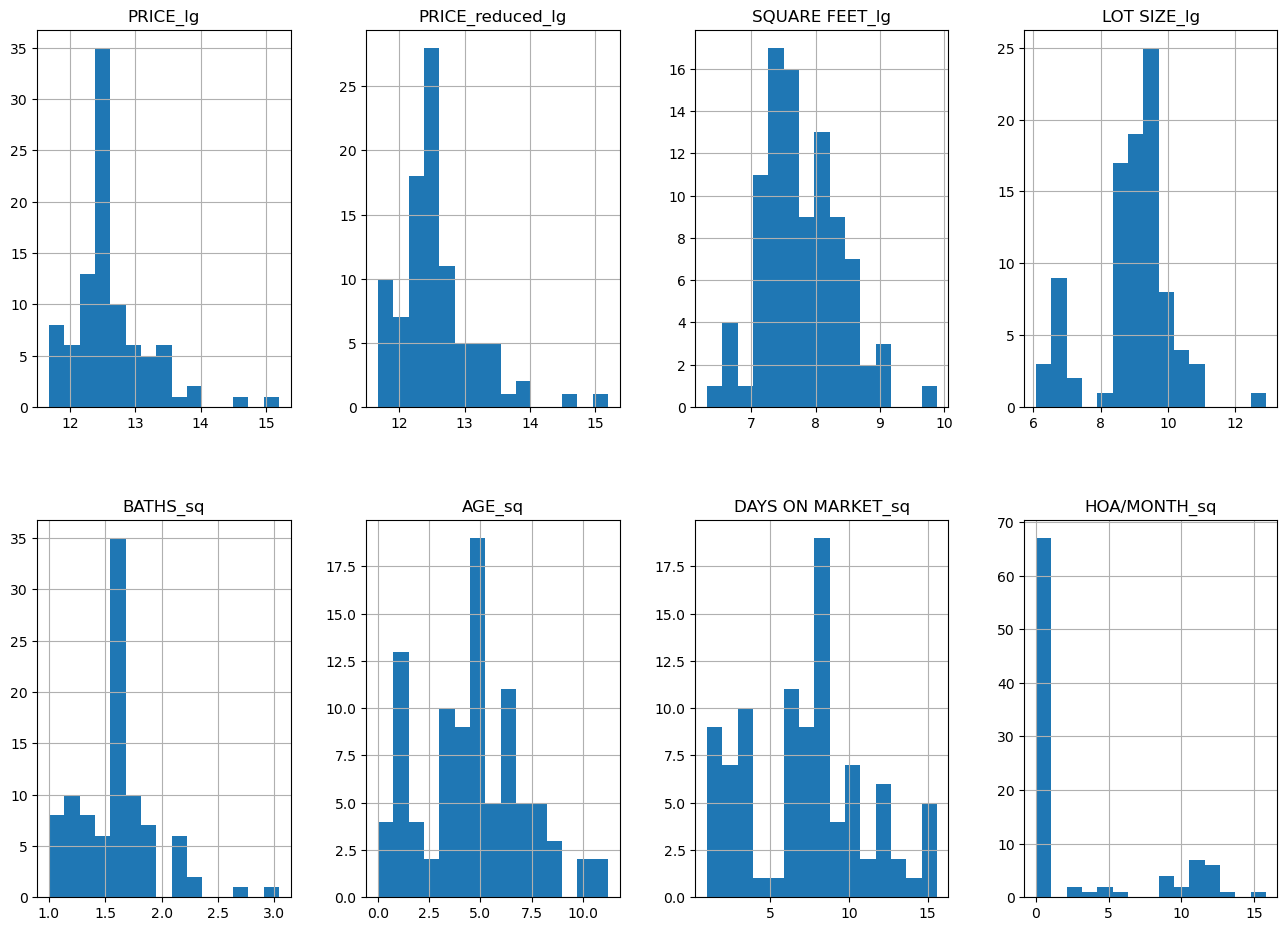

In [13]:
# log transform all the numeric variables
df_corrT = pd.DataFrame()# create an empty dataframe to store new vars

#create new transformed variables
df_corrT['PRICE_lg'] = np.log(df["PRICE"])
df_corrT['PRICE_reduced_lg'] = np.log(df["PRICE_reduced"])
df_corrT['SQUARE FEET_lg'] = np.log(df['SQUARE FEET'])
df_corrT['LOT SIZE_lg'] = np.log(df['LOT SIZE'])


df_corrT['BATHS_sq'] = np.sqrt(df['BATHS'])
df_corrT['AGE_sq'] = np.sqrt(df['AGE'])
df_corrT['DAYS ON MARKET_sq'] = np.sqrt(df['DAYS ON MARKET'])
df_corrT['HOA/MONTH_sq'] = np.sqrt(df['HOA/MONTH'])


# generate histograms of remaining numerical vars
df_corrT.hist(layout=(4,4), figsize=(16,24), bins=15)
plt.show()

**What happens to the transformed variables? Are any variables still not normally distributed, and what does this mean for our analysis?**

HOA/Month_SQ - the rest are sort of normally distributed not all unimodal.
The values that aren't normally distributed are due to the skewness of the data, if they are super skewed then they will remain skewed.

**Add BEDS and B2 into your new transformed dataframe...**

In [15]:
df_corrT['BEDS'] = np.sqrt(df["BEDS"])
df_corrT['Beauty'] = np.sqrt(df["Beauty"])

# view heading
df_corrT.head()

,PRICE_lg,PRICE_reduced_lg,SQUARE FEET_lg,LOT SIZE_lg,BATHS_sq,AGE_sq,DAYS ON MARKET_sq,HOA/MONTH_sq,BEDS,Beauty
0,13.457406,13.335861,9.049115,10.967060,2.121320,5.196152,15.588457,0.0,2.645751,1.825742
1,13.457406,13.335861,9.049115,10.967060,2.121320,5.196152,15.588457,0.0,2.645751,1.914854
2,13.384728,13.253392,7.627544,9.988747,1.224745,11.224972,15.491933,0.0,2.000000,2.160247
3,13.910821,13.835313,8.828641,11.018350,2.345208,4.242641,15.491933,0.0,2.645751,2.081666
4,12.923912,12.736701,8.323123,9.443989,1.870829,5.000000,15.132746,0.0,2.236068,2.380476


## 2)

**Produce a correlation matrix using Pearson correlation analysis**

In [17]:
# drop HOA/month
df_corrT.drop(columns=['HOA/MONTH_sq'], inplace=True)

In [18]:
# create correlation matrix, store in cor_matrix
cor_matrix = df_corrT.corr()

cor_matrix.style.background_gradient(cmap='seismic', axis=None, vmin=-1, vmax=1) # formatting matrix

,PRICE_lg,PRICE_reduced_lg,SQUARE FEET_lg,LOT SIZE_lg,BATHS_sq,AGE_sq,DAYS ON MARKET_sq,BEDS,Beauty
PRICE_lg,1.000000,0.994935,0.891807,0.774497,0.853091,-0.022952,0.404721,0.734595,-0.061144
PRICE_reduced_lg,0.994935,1.000000,0.889746,0.757182,0.851830,-0.023735,0.319698,0.730598,-0.073715
SQUARE FEET_lg,0.891807,0.889746,1.000000,0.744221,0.832416,-0.026895,0.379996,0.843261,-0.029265
LOT SIZE_lg,0.774497,0.757182,0.744221,1.000000,0.598275,0.041178,0.386984,0.598177,0.048207
BATHS_sq,0.853091,0.851830,0.832416,0.598275,1.000000,-0.096329,0.316096,0.784848,-0.111613
AGE_sq,-0.022952,-0.023735,-0.026895,0.041178,-0.096329,1.000000,-0.001908,0.140730,0.065876
DAYS ON MARKET_sq,0.404721,0.319698,0.379996,0.386984,0.316096,-0.001908,1.000000,0.341802,0.034338
BEDS,0.734595,0.730598,0.843261,0.598177,0.784848,0.140730,0.341802,1.000000,-0.096232
Beauty,-0.061144,-0.073715,-0.029265,0.048207,-0.111613,0.065876,0.034338,-0.096232,1.000000


### A)
**What is the strongest correlation (ignoring price and price reduced), what does it mean?**

The largest correlation is squart ft lg and beds.  This means that as sqare footage increases so does beds.

### B)
**Examine the variable pair from your hypotheses, then describe the relationship (strong/weak, positive/negative):**

strong

## 3)
**Plot your variable pair and test the statistical significance**

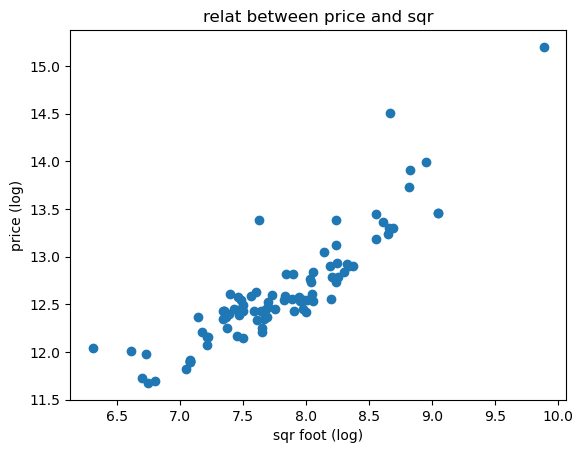

Pearson correlation coefficient: 0.8918072348131563
P-value: 1.891771007858882e-33
 null hypothesis


In [19]:

# Create a scatter plot of the two variables
plt.scatter(df_corrT['SQUARE FEET_lg'], df_corrT['PRICE_lg'])
plt.xlabel('sqr foot (log)')
plt.ylabel('price (log)')
plt.title('relat between price and sqr')
plt.show()

# Calculate the Pearson correlation coefficient
corr, p_value = pearsonr(df_corrT['SQUARE FEET_lg'], df_corrT['PRICE_lg'])

# Print the results
print('Pearson correlation coefficient:', corr)
print('P-value:', p_value)

# Test the null hypothesis
alpha = 0.05
if p_value < alpha:
    print(' null hypothesis')
else:
    print(' null hypothesis')


## 4) T-Tests

**Let's now examine different types of T-Tests to evaluate some additional hypotheses that would be useful for Innergystic Homes to know. Let's begin with a two-sample independent t-test...**

## A)

**What is tested using an Two-Sample Independent T-Test?**

**Two-Sample Independent T-test**:

In [21]:
# view variables
df.columns

Index(['Unnamed: 0', 'SINGLE-FAMILY', 'QUADRANT', 'CITY', 'PRICE',
       'PRICE_reduced', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', 'AGE', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH',
       'LATITUDE', 'LONGITUDE', 'Beauty'],
      dtype='object')

In [22]:
# check value_counts of variable to test
df["SINGLE-FAMILY"].value_counts()

SINGLE-FAMILY
y    77
n    17
Name: count, dtype: int64

### B)
**Produce a set of hypotheses that tests the difference between two groups (e.g., Single or Non-Single Family homes) on some dependent variable:**

* $H_0$: There is no significant difference in the mean price between single-family and non-single-family homes
* $H_A$: There is a significant difference in the mean price between single-family and non-single-family homes

In [34]:
# Ensure "DAYS ON MARKET" is numeric
df["DAYS ON MARKET"] = pd.to_numeric(df["DAYS ON MARKET"], errors="coerce")

# Create two groups based on single-family homes
single_family_days_on_market = df[df["SINGLE-FAMILY"] == "y"]["DAYS ON MARKET"].dropna()
non_single_family_days_on_market = df[df["SINGLE-FAMILY"] == "n"]["DAYS ON MARKET"].dropna()

# Apply square root transformation
single_family_days_on_market = np.sqrt(single_family_days_on_market)
non_single_family_days_on_market = np.sqrt(non_single_family_days_on_market)

# Perform a two-sample independent t-test
t_stat, p_value = ttest_ind(single_family_days_on_market, non_single_family_days_on_market, equal_var=False)

# Print the results
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Test significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in days on the market between single-family and non-single-family homes.")
else:
    print("Fail to reject the null hypothesis: No significant difference in days on the market between single-family and non-single-family homes.")


T-statistic: 3.2680599064540403, P-value: 0.002657174780362853
Reject the null hypothesis: There is a significant difference in days on the market between single-family and non-single-family homes.


In [36]:
# view means grouped by SINGLE-FAMILY
df.groupby("SINGLE-FAMILY")["DAYS ON MARKET"].mean()

SINGLE-FAMILY
n    33.588235
y    75.922078
Name: DAYS ON MARKET, dtype: float64

### C)

**What can we conclude about your DV in regards to the home type (single vs non single family)? What would you recommend investing in and why?**

single family homes take significantly longer to sell compared to multi family. If we need more flexibility then multifamily as they can be liquidated more quickly if not, single family may be better.

In [37]:
df.columns

Index(['Unnamed: 0', 'SINGLE-FAMILY', 'QUADRANT', 'CITY', 'PRICE',
       'PRICE_reduced', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', 'AGE', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH',
       'LATITUDE', 'LONGITUDE', 'Beauty'],
      dtype='object')

### D)
**What is tested using a Two-Sample Paired T-Test?**

**Two-Sample Paired T-Test**:


In [42]:
df["PRICE"] = pd.to_numeric(df["PRICE"], errors="coerce")
df["PRICE_reduced"] = pd.to_numeric(df["PRICE_reduced"], errors="coerce")

df_corrT = pd.DataFrame()
df_corrT['PRICE_lg'] = np.log(df["PRICE"])
df_corrT['PRICE_reduced_lg'] = np.log(df["PRICE_reduced"])

t_stat, p_value = ttest_rel(df_corrT["PRICE_lg"], df_corrT["PRICE_reduced_lg"])

print(f'T-statistic: {t_stat}, P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the original and reduced prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the original and reduced prices.")

T-statistic: 9.919623995240435, P-value: 3.027291414599742e-16
Reject the null hypothesis: There is a significant difference between the original and reduced prices.


### E)

**What set of variables could be used to evaluate a two-sample paired t-test in this dataset? Produce a set of hypotheses to evaluate this test:**

* $H_0$: There is no significant difference between the original price and the reduced price
* $H_A$: There is a significant difference between the original price and the reduced price



In [40]:
# run a paired t test between PRICE_lg and PRICE_reduced_lg

t_stat, p_value = ttest_rel(df_corrT["PRICE_lg"], df_corrT["PRICE_reduced_lg"])

# Print the results
print(f'T-statistic: {t_stat}, P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the original and reduced prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the original and reduced prices.")

T-statistic: 9.919627701199216, P-value: 3.027236812414758e-16
Reject the null hypothesis: There is a significant difference between the original and reduced prices.


In [43]:
# examine the mean values for both variables
mean_price = df["PRICE"].mean()
mean_price_reduced = df["PRICE_reduced"].mean()

print(f"Mean PRICE: {mean_price}")
print(f"Mean PRICE_reduced: {mean_price_reduced}")

Mean PRICE: 385995.1808510638
Mean PRICE_reduced: 366739.8617021277


## 5) Let's check the relationship between price reduction and days on the market!

In [44]:
df['reduced_amount'] = df["PRICE"] - df["PRICE_reduced"]
# create a reduced_amount from original price and reduced price
df.head()

,Unnamed: 0,SINGLE-FAMILY,QUADRANT,CITY,PRICE,PRICE_reduced,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,AGE,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,Beauty,reduced_amount
0,34,y,NE,North Logan,699000,619000,7,4.5,8511,57934.0,1992,27,243,82,0,41.759955,-111.802758,3.333333,80000
1,35,y,NE,North Logan,699000,619000,7,4.5,8511,57934.0,1992,27,243,82,0,41.759955,-111.802758,3.666667,80000
2,0,y,NE,Logan,650000,570000,4,1.5,2054,21780.0,1893,126,240,316,0,41.744230,-111.817663,4.666667,80000
3,55,y,NE,North Logan,1100000,1020000,7,5.5,6827,60983.0,2001,18,240,161,0,41.790339,-111.785897,4.333333,80000
4,38,y,SE,Providence,410000,340000,5,3.5,4118,12632.0,1994,25,229,100,0,41.702689,-111.801081,5.666667,70000


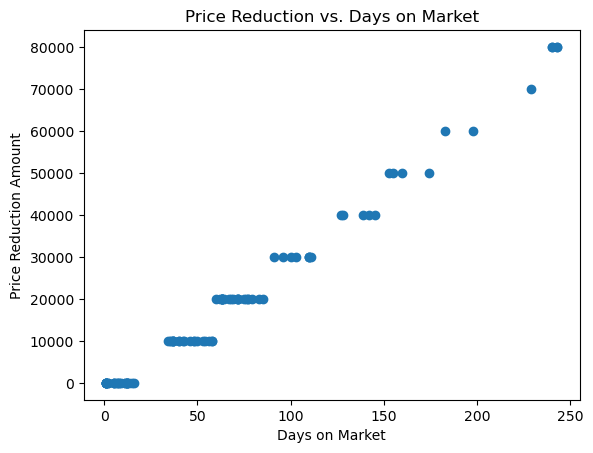

In [45]:
# create a scatterplot of the relationship between reduced_amount and days on the market
plt.scatter(df["DAYS ON MARKET"], df["reduced_amount"])
plt.xlabel("Days on Market")
plt.ylabel("Price Reduction Amount")
plt.title("Price Reduction vs. Days on Market")
plt.show()

**A) How would you describe the relationship between the amount the price has been reduced and how long a property has been on the market?**

linear

## 6) Final Recommendations

### A)
**Considering your correlation analysis, which variables would you recommend the Developers focus on when deciding which properties to purchase, why?**

I think size and single family vs non single family.  These are both clearly good options as they are highly correlated.  home type would be good as it could allow us to provide more flexibility.

### B)
**Considering your T-Tests, what recommendations can you make regarding property types and/or when to purchase properties?**

For buyers, properties that have been on the market longer are more likely to have price reductions, making them ideal targets for negotiation. Non-single-family homes tend to sell faster, suggesting they may be a better investment for quicker turnover. Sellers should price competitively early to avoid prolonged time on the market and potential price reductions.